In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [113]:
df = pd.read_csv('final_cleaned_v2.csv')

# Isolation Forest (uses ensemble method of Randsom forest)

In [114]:
num_cols = df.select_dtypes(include=[int, float])
x = num_cols.drop(columns=['price'])
from sklearn.ensemble import IsolationForest
labels = IsolationForest(contamination='auto',n_estimators=100,random_state=0,bootstrap=True).fit_predict(x)
df['outliers'] = labels
df[df['outliers'] == -1].shape

(843, 24)

In [115]:
# df[df['outliers'] == -1].head()

# We will perform outlier detection only on Numerical columns

In [116]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'outliers'],
      dtype='object')

# price (target)

np.float64(3.3113346542178137)

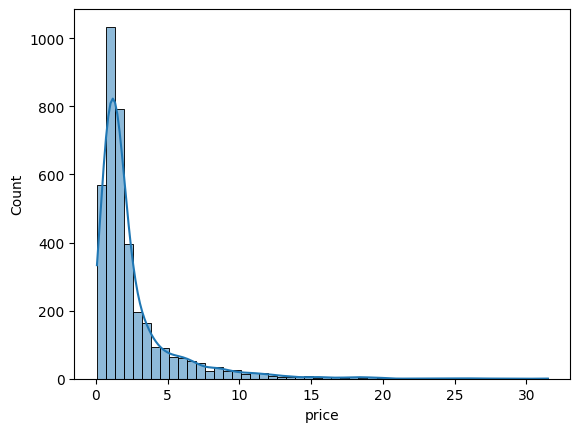

In [117]:
sns.histplot(df['price'], bins=50,kde=True)
df['price'].skew()

Distribution is not normal , so we will perform IQR Boxplot method

<Axes: xlabel='price'>

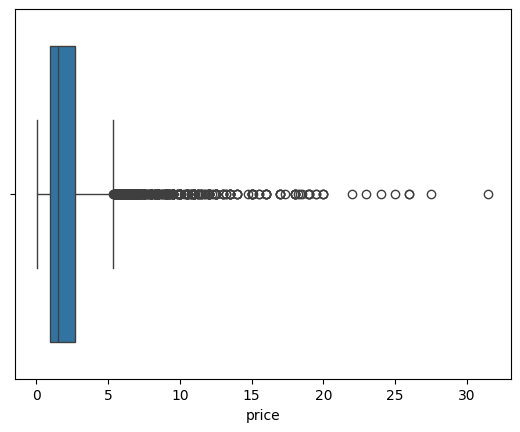

In [118]:
sns.boxplot(x=df['price'])

In [119]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

price_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
price_outliers.shape

(432, 24)

In [120]:
price_outliers.sort_values(by='price', ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74,-1
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42,-1
2211,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72,-1
2488,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138,-1
1686,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0,-1
3046,house,emaar the palm springs,sector 54,24.0,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122,-1
2765,house,independent,sector 26,23.0,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145,-1
2667,house,vipul tatvam villa,sector 48,22.0,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54,-1
2096,house,luxury dlf city floors,sector 26,20.0,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31,-1
874,house,dlf city plots,sector 26,20.0,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153,-1


# price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

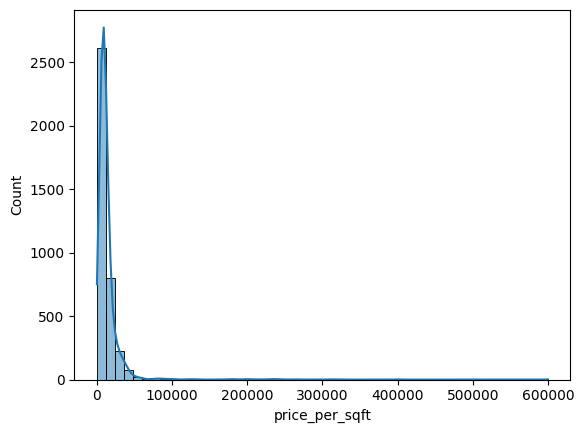

In [121]:
sns.histplot(df['price_per_sqft'], bins=50,kde=True)

<Axes: xlabel='price_per_sqft'>

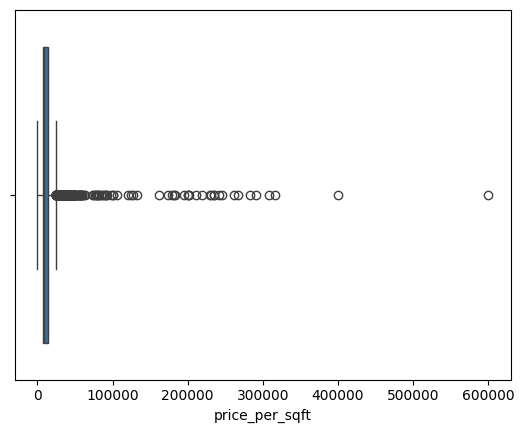

In [122]:
sns.boxplot(x=df['price_per_sqft'])

In [123]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

price_per_sqft_outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
price_per_sqft_outliers.shape

(367, 24)

In [124]:
price_per_sqft_outliers.sort_values(by='price_per_sqft', ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122,-1
2850,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114,-1
2461,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0,-1
2047,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53,-1
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,1,49,-1
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,NaN,240.0,NaN,0,1,0,0,0,0,49,-1
3449,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,NaN,300.0,NaN,1,1,0,1,0,0,21,-1
2161,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,NaN,402.0,NaN,0,1,0,1,0,1,91,-1
3519,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,2,7,-1
2277,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,0,70,-1


In [125]:
price_per_sqft_outliers['area'] = price_per_sqft_outliers['area'].apply(lambda x: x*9 if x< 1000 else x)

C:\Users\User\AppData\Local\Temp\ipykernel_2932\12973363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_per_sqft_outliers['area'] = price_per_sqft_outliers['area'].apply(lambda x: x*9 if x< 1000 else x)


In [126]:
price_per_sqft_outliers['price_per_sqft'] = ((price_per_sqft_outliers['price']*10000000)/price_per_sqft_outliers['area']).round(2)

C:\Users\User\AppData\Local\Temp\ipykernel_2932\2529082133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_per_sqft_outliers['price_per_sqft'] = ((price_per_sqft_outliers['price']*10000000)/price_per_sqft_outliers['area']).round(2)


In [127]:
price_per_sqft_outliers.sort_values(by='price_per_sqft', ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
2211,house,independent,sector 26,26.0,82539.68,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72,-1
3046,house,emaar the palm springs,sector 54,24.0,66666.67,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122,-1
1425,house,project housing board colony,sector 31,8.0,63492.06,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0,1
1640,house,emaar the palm springs,sector 54,14.0,62222.22,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160,-1
1839,house,unitech escape,sector 50,10.8,60000.00,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103,-1
1261,house,independent,sector 25,16.0,59259.26,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72,-1
1349,flat,unitech vistas,sector 70,9.0,57507.99,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0,1
2488,house,dlf city plots,sector 26,26.0,57205.72,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138,-1
671,house,emaar mgf marbella,sector 66,18.0,55555.56,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75,-1
386,house,cloudnine cottages,sohna road,5.5,55000.00,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0,1


In [128]:
df.update(price_per_sqft_outliers)

<Axes: xlabel='price_per_sqft'>

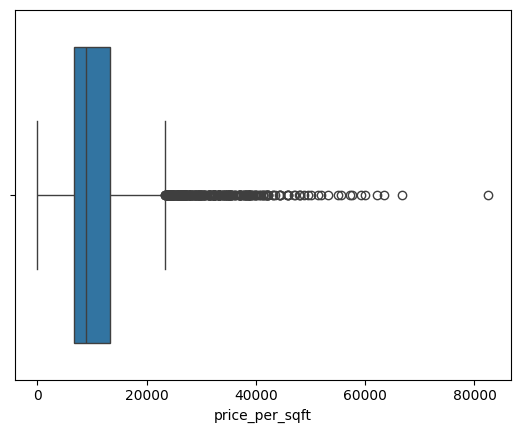

In [129]:
sns.boxplot(x=df['price_per_sqft'])

In [130]:
df[df['price_per_sqft']>50000].shape

(13, 24)

In [131]:
df = df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

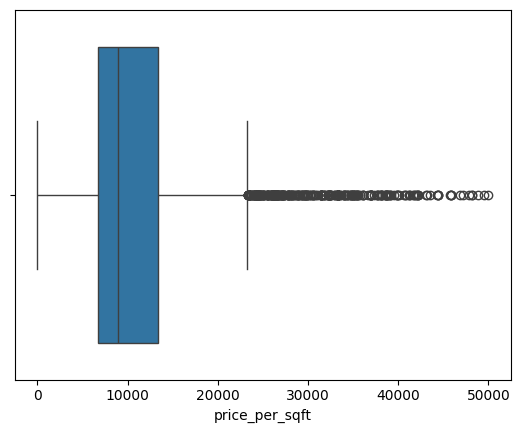

In [132]:
sns.boxplot(x=df['price_per_sqft'])

# Area

<Axes: xlabel='area', ylabel='Count'>

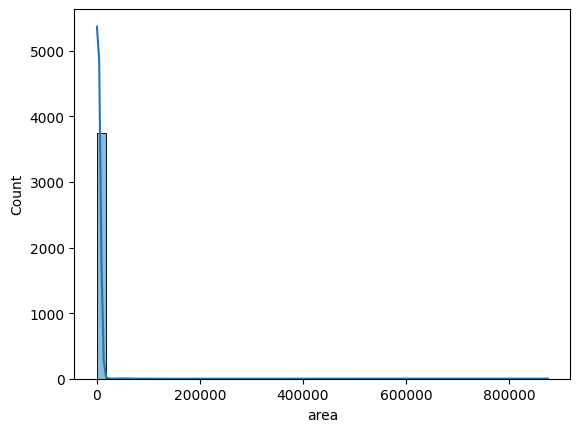

In [133]:
sns.histplot(df['area'], bins=50,kde=True)

<Axes: xlabel='area'>

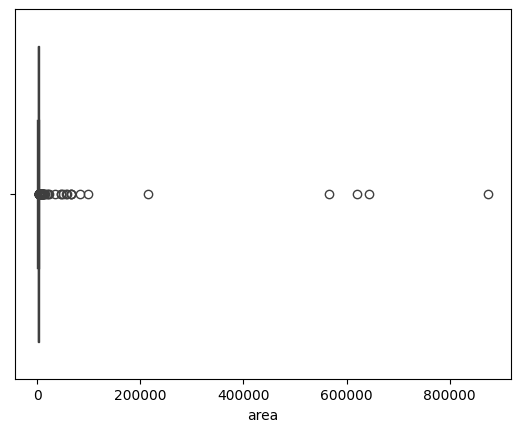

In [134]:
sns.boxplot(x=df['area'])

In [135]:
df[df['area'] > 10000].shape


(25, 24)

In [136]:
df[df['area']>100000].sort_values(by='area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44,-1
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76,-1
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65,-1
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44,-1
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0,-1


High area and low prices , so we can remove them.

In [137]:
df = df[df['area']<100000]

<Axes: xlabel='area'>

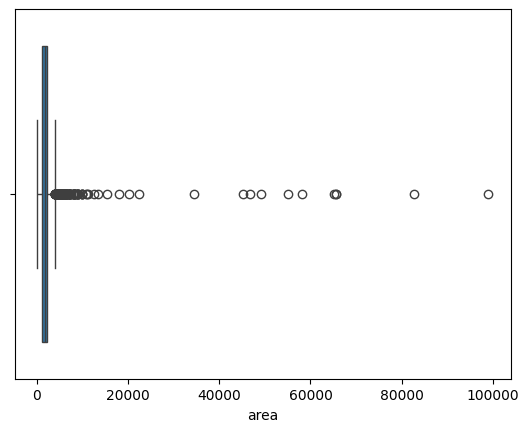

In [138]:
sns.boxplot(x=df['area'])

<Axes: xlabel='area', ylabel='Count'>

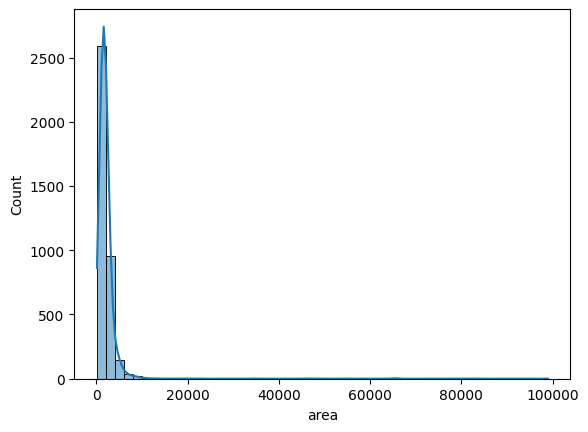

In [139]:
sns.histplot(df['area'], bins=50,kde=True)

In [140]:
df[df['area']>10000].shape

(20, 24)

In [141]:
df = df[df['area']<10000]

<Axes: xlabel='area'>

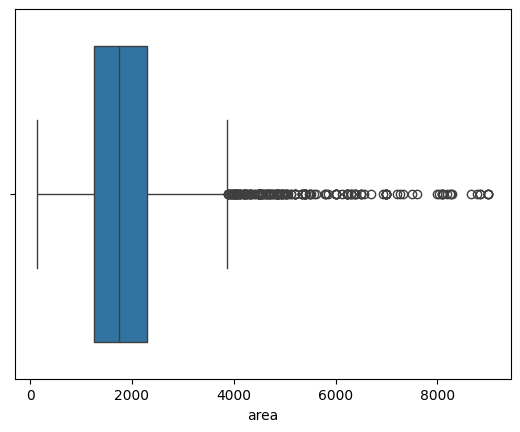

In [142]:
sns.boxplot(x=df['area'])

np.float64(2.0811323971562783)

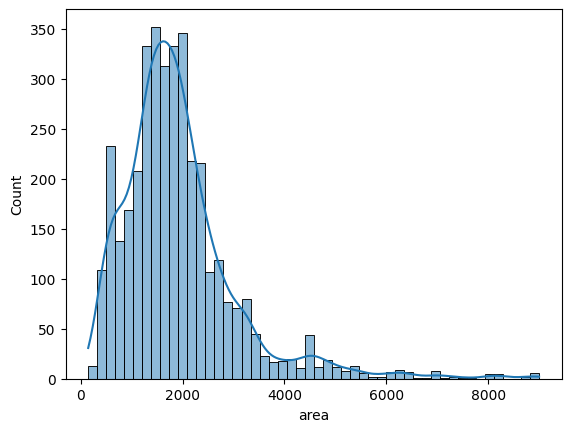

In [143]:
sns.histplot(df['area'], bins=50,kde=True)
df['area'].skew()

# Bedrooms

np.float64(3.522878765832131)

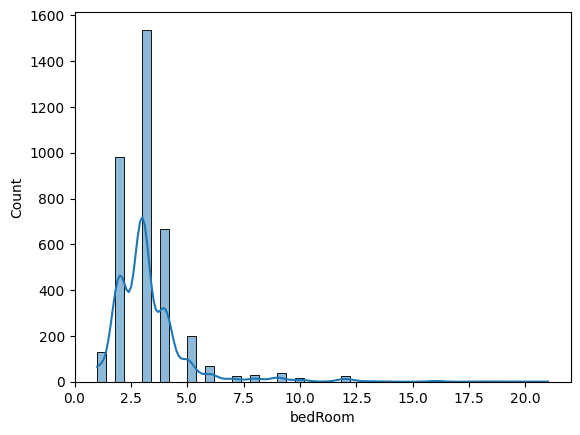

In [144]:
sns.histplot(df['bedRoom'], kde=True,bins=50)
df['bedRoom'].skew()

<Axes: xlabel='bedRoom'>

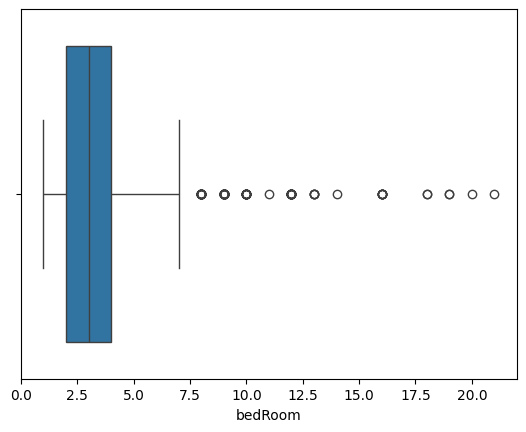

In [145]:
sns.boxplot(x=df['bedRoom'])

In [146]:
q1 = df['bedRoom'].quantile(0.25)
q3 = df['bedRoom'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

bedroom_outliers = df[(df['bedRoom'] < lower_bound) | (df['bedRoom'] > upper_bound)]
bedroom_outliers.shape

(130, 24)

In [147]:
upper_bound

np.float64(7.0)

In [148]:
bedroom_outliers.sort_values(by='bedRoom', ascending=False).head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
3618,house,independent,sector 54,5.00,43066.32,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49,-1
2611,house,independent,sector 43,4.50,39062.50,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22,-1
78,house,independent,sector 17,3.87,5160.00,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68,-1
1493,house,independent,sector 17,3.93,24214.42,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74,-1
1381,house,private house,sector 55,7.05,46906.19,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57,-1


In [149]:
df = df[df['bedRoom']<10]

<Axes: xlabel='bedRoom'>

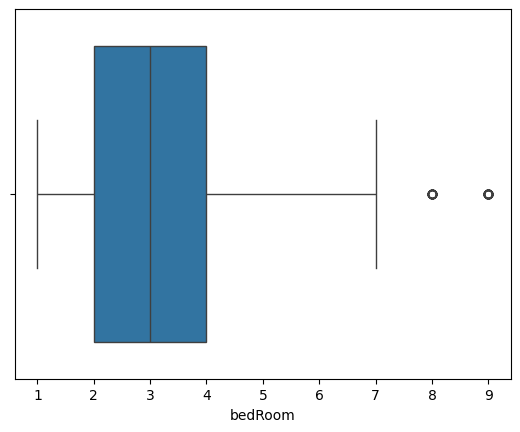

In [150]:
sns.boxplot(x=df['bedRoom'])

np.float64(1.6960336901172313)

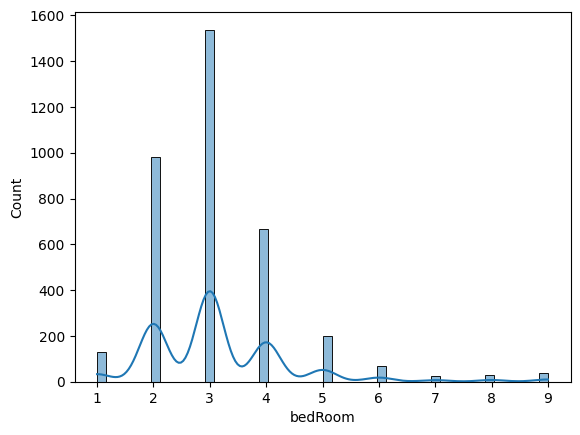

In [151]:
sns.histplot(df['bedRoom'], kde=True,bins=50)
df['bedRoom'].skew()

# Bathroom

np.float64(1.3217376400563896)

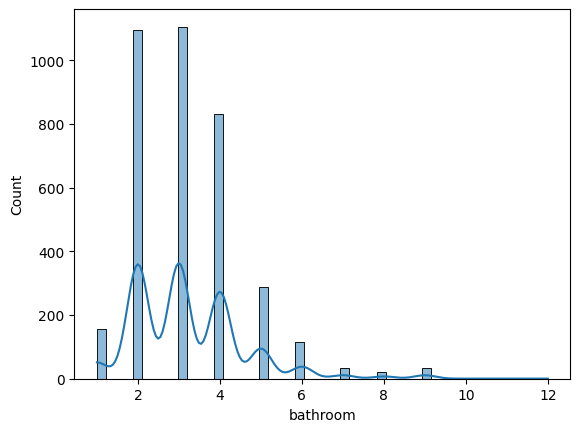

In [152]:
sns.histplot(df['bathroom'],bins=50,kde=True)
df['bathroom'].skew()

<Axes: xlabel='bathroom'>

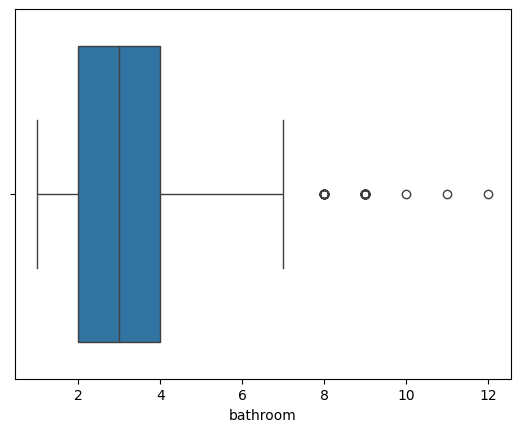

In [153]:
sns.boxplot(x=df['bathroom'])

In [154]:
df[df['bathroom']>=10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
545,house,independent,sector 24,10.00,25542.78,3915.0,Carpet area: 435 (40.41 sq.m.),8,10,3+,1.0,West,Undefined,NaN,NaN,435.0,0,0,0,0,0,0,0,-1
2816,house,independent,sector 24,11.00,28901.73,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39,-1
3267,house,adani brahma samsara,sector 60,18.02,28200.31,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146,-1


# Super Builtup Area

<Axes: xlabel='super_built_up_area'>

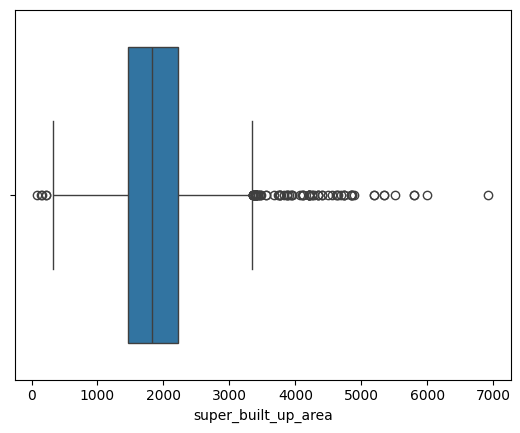

In [155]:
sns.boxplot(x=df['super_built_up_area'])

np.float64(1.3428282845456485)

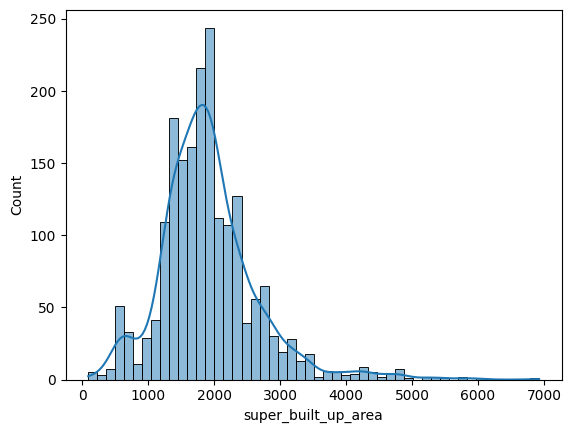

In [156]:
sns.histplot(df['super_built_up_area'], bins=50, kde=True)
df['super_built_up_area'].skew()

In [157]:
df[df['super_built_up_area']>6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140,-1


# Builtup area

<Axes: xlabel='built_up_area'>

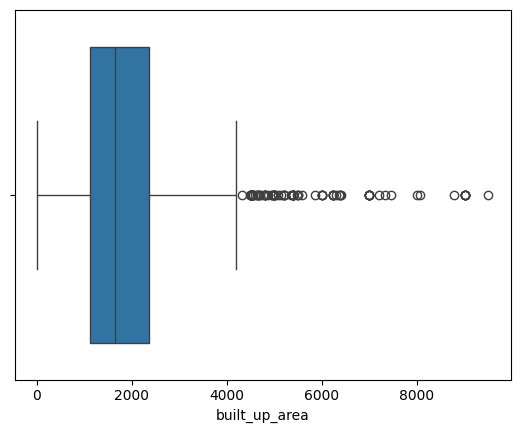

In [158]:
sns.boxplot(x=df['built_up_area'])

np.float64(1.861093039976854)

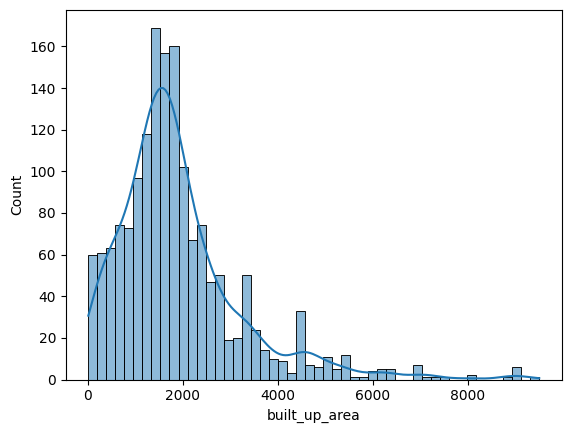

In [159]:
sns.histplot(df['built_up_area'], bins=50, kde=True)
df['built_up_area'].skew()

In [160]:
df[df['built_up_area'] >6000].shape

(30, 24)

In [161]:
df[df['built_up_area'] >6000].sort_values(by='built_up_area', ascending=False).head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers
114,house,independent,sector 25,10.0,37037.04,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5,5,3+,3.0,East,Moderately Old,NaN,9500.0,9000.0,0,1,0,1,0,2,29,-1
323,house,anamika enclave,sector 12,6.0,14492.00,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 900...,9,9,3+,3.0,North-West,Old Property,NaN,9000.0,NaN,0,0,0,0,0,0,9,-1
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.00,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74,-1
1325,house,ansal sushant lok plots,sector 43,11.5,17692.00,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7,8,3+,3.0,NaN,Old Property,NaN,9000.0,6500.0,0,1,1,1,0,1,31,-1
2765,house,independent,sector 26,23.0,25555.56,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145,-1


# area_room_ratio

In [162]:
x = df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']).quantile(.05) 

# 5th percentile represents the lower bound of the ratio , which is problematic

np.float64(259.5)

In [163]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [164]:
df[df['area_room_ratio']<100].sort_values(by='area_room_ratio', ascending=True).shape

(20, 25)

In [165]:
df = df[df['area_room_ratio']>100]

In [166]:
df.sort_values(by='area_room_ratio', ascending=True).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,outliers,area_room_ratio
3309,house,independent,sector 4,0.50,9259.0,540.0,Plot area 540(50.17 sq.m.),5,3,2,3.0,West,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,0,1,108.000000
2173,house,housing board colony,sector 28,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),8,8,3+,4.0,South-East,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,1,38,-1,112.500000
3069,house,independent,sector 7,0.27,12000.0,225.0,Plot area 225(20.9 sq.m.),2,2,1,2.0,North-East,Moderately Old,NaN,225.0,NaN,0,0,0,0,0,0,12,1,112.500000
3633,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,1,113.000000
1224,house,independent,sector 6,0.75,10518.0,713.0,Plot area 713(66.24 sq.m.),6,4,1,3.0,NaN,Moderately Old,NaN,713.0,NaN,0,0,0,0,0,0,62,1,118.833333


In [167]:
outlier_df =df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [168]:
outlier_df['bedRoom'] = (outlier_df['bedRoom']/outlier_df['floorNum']).round()

C:\Users\User\AppData\Local\Temp\ipykernel_2932\2194356770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = (outlier_df['bedRoom']/outlier_df['floorNum']).round()


In [169]:
outlier_df['bedRoom'].value_counts()

bedRoom
2.0    37
3.0    17
4.0     7
1.0     5
5.0     5
6.0     2
9.0     2
8.0     2
Name: count, dtype: int64

In [170]:
df.update(outlier_df)

In [171]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [172]:
# df.sort_values(by='bedRoom', ascending=False).head()

In [173]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(11, 25)

In [176]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

In [177]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape

(0, 25)

In [179]:
df.shape

(3649, 25)

In [180]:
num_cols = df.select_dtypes(include=[int, float])
x = num_cols.drop(columns=['price'])
from sklearn.ensemble import IsolationForest
labels = IsolationForest(contamination='auto',n_estimators=100,random_state=0,bootstrap=True).fit_predict(x)
df['outliers'] = labels
df[df['outliers'] == -1].shape

(954, 25)

In [182]:
df.to_csv('outliers_treated.csv')